In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Задача 3

## Визуализация выборки

In [3]:
data = np.loadtxt('hard_train.txt')
data = data[:6001]

In [9]:
labels = loadtxt('hard_train_labels.txt')
labels = labels[:6001]

Применям tSNE

In [4]:
model = TSNE(n_components=2, random_state=0)
data_transform = model.fit_transform(data)

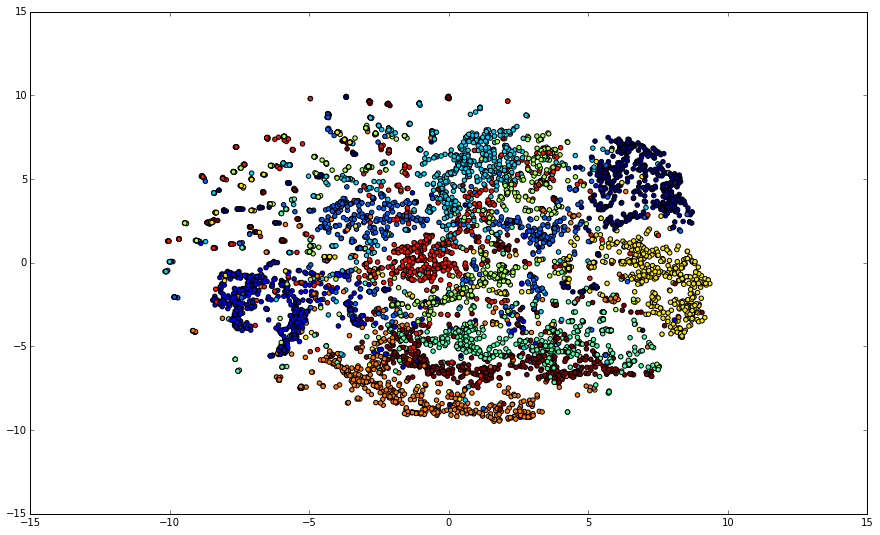

In [12]:
plt.figure(figsize=(15, 9))
plt.scatter(data_transform[:,0], data_transform[:,1], c=labels)
plt.show()

## Применение kNN к полученным сжатым данным 

In [16]:
data_train = data_transform[:5001]
data_test = data_transform[-5001:]
labels_train = labels[:5001]
labels_test = labels[-5001:]

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn.metrics import accuracy_score

Считаем accuracy для  kNN, $k\in\{1, \ldots , 9\}.$

In [24]:
accuracy = []
for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    model.fit(data_train, labels_train)
    accuracy.append(accuracy_score(labels_test, model.predict(data_test)))

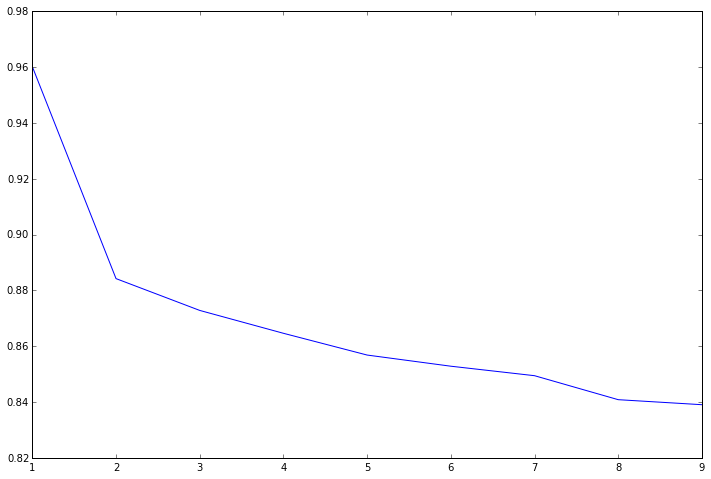

In [25]:
plt.figure(figsize=(12,8))
plt.plot(range(1,10), accuracy)
plt.show()

Вывод: 1 ближайший сосед дал наилучший результат.

# Задача 4

 Условие: $$\ f(x)= (x_1 - 1)^2 + 2(x_1^2 - x_2 - 1)^2 \rightarrow min_{x}$$

### Уровни функции

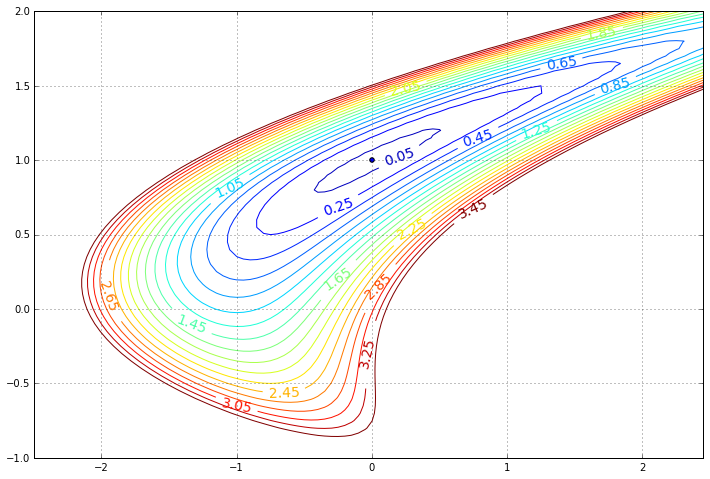

In [235]:
grid = np.mgrid[-2.5:2.5:0.05, -2.5:2.5:0.05]
f_list = np.array([[f([grid[0, i, j], grid[1, i, j]]) 
                   for i in range(grid[0].shape[0])]
                   for j in range(grid[1].shape[1])])

plt.figure(figsize=(12,8))
CS = plt.contour(grid[0], grid[1], f_list, np.arange(-0.15,3.5,0.2))  # нарисовать указанные линии уровня
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f')
plt.xlim((np.min(grid[0]), np.max(grid[0])))
plt.scatter([0],[1])
plt.ylim((-1, 2))
#plt.plot(x1,x2, 'o-')
plt.grid()
plt.show()

## Оптимизация

In [5]:
def f(x):
    return (x[0] - 1) ** 2 + 2 * (x[0] ** 2 - x[1] - 1) ** 2

def df_dx1(x):
    return 2 * (x[0] - 1) + 8 * x[0] * (x[0] ** 2 - x[1] - 1)
    
def df_dx2(x):
    return 4 * (x[0] ** 2 - x[1] - 1) * (-1)

In [6]:
def create_plot(min_x, max_x, x1, x2, min_f=0., max_f=3., precision=0.2):
    grid = np.mgrid[min_x:max_x:0.05, min_x:max_x:0.05]
    f_list = np.array([[f([grid[0, i, j], grid[1, i, j]]) 
                       for i in range(grid[0].shape[0])]
                       for j in range(grid[1].shape[1])])

    plt.figure(figsize=(12,8))
    CS = plt.contour(grid[0], grid[1], f_list, np.arange(min_f,max_f,precision))  # нарисовать указанные линии уровня
    plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f')
    plt.xlim((np.min(grid[0]), np.max(grid[0])))
    plt.scatter([0],[1])
    plt.ylim((min_x-0.5, max_x+0.5))
    plt.plot(x2, x1, 'o-', color='black')
    plt.grid()
    plt.show()
    

## Градиентный спуск

In [311]:
def gradient_descent(start_point, step, max_number_iterations = 400, derivative_lower_bound = 10**(-8)):
    x1 = [start_point[0]]
    x2 = [start_point[1]]
    for i in range(max_number_iterations):
        d1 = df_dx1([x1[-1], x2[-1]])
        d2 = df_dx2([x1[-1], x2[-1]])
        #print d1, d2
        if sqrt(d1 ** 2 + d2 ** 2) < derivative_lower_bound:
            #print "broken by derivative lower bound"
            break
        else:
            x1.append(x1[-1] - step * d1)
            x2.append(x2[-1] - step * d2)
                    
    return x1, x2

### $\lambda = 0.15$ - градиентный спуск не сходится 

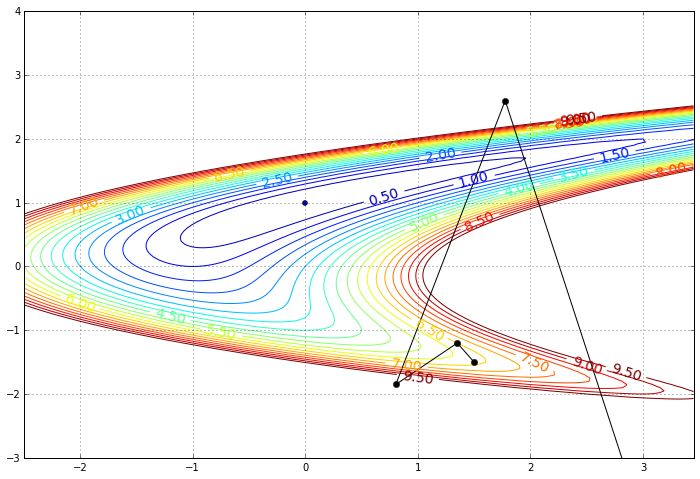

In [237]:
x1, x2 = gradient_descent([-1.5, 1.5], 0.15, max_number_iterations=5)
create_plot(-2.5, 3.5, x1, x2, max_f=10, precision=0.5)

### $\lambda = 0.09$ - градиентный спуск сходится

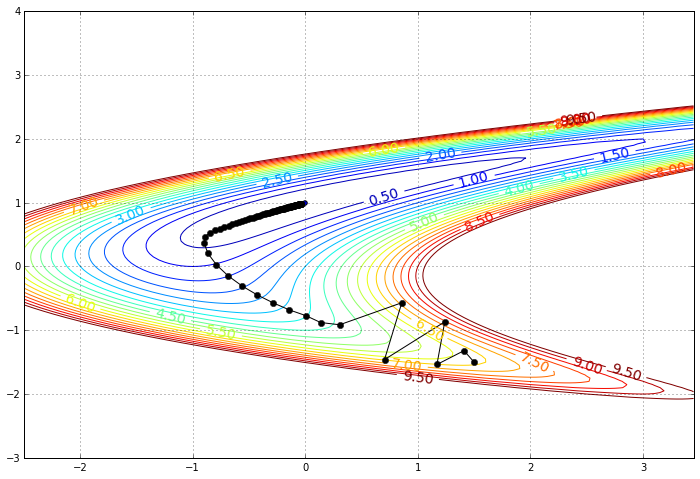

In [325]:
x1, x2 = gradient_descent([-1.5, 1.5], 0.09, max_number_iterations=100)
create_plot(-2.5, 3.5, x1, x2, max_f=10, precision=0.5)

### $\lambda = 0.003$ - градиентный спуск сходится медленно

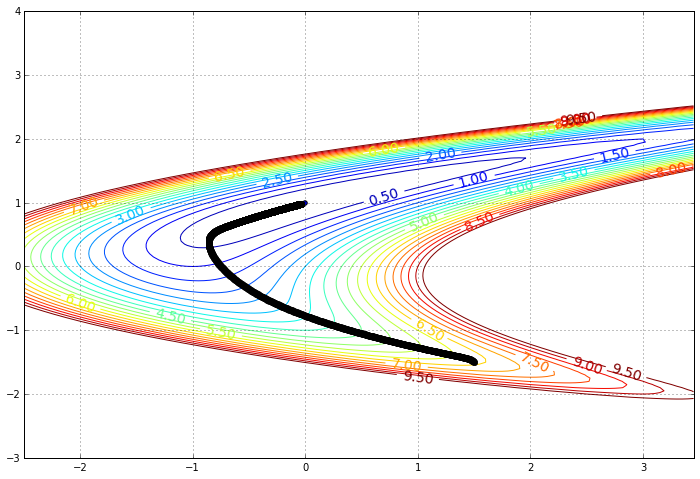

In [249]:
x1, x2 = gradient_descent([-1.5, 1.5], 0.003, max_number_iterations=3000)
create_plot(-2.5, 3.5, x1, x2, max_f=10, precision=0.5)

### Исследование скорости сходимости

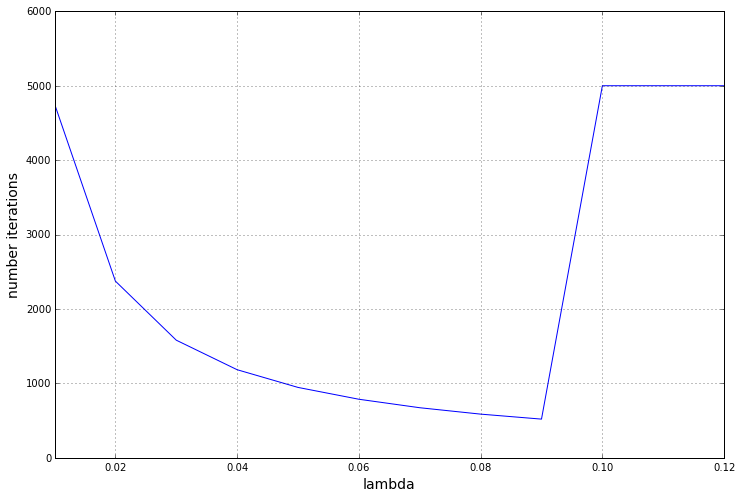

In [340]:
iterations = []
for i in arange(0.01, 0.13, 0.01):
    x1, x2 = gradient_descent([-1.5, 1.5], step=i, max_number_iterations=5000)
    iterations.append(len(x1))
    
plt.figure(figsize=(12,8))
plt.plot(arange(0.01, 0.13, 0.01), iterations)
plt.xlabel('lambda', fontsize=14)
plt.ylabel('number iterations', fontsize=14)
plt.xlim((0.01, 0.12))
plt.grid()
plt.show()

#### Вывод: при $\alpha < 0.1$ - сходится, при $\alpha \geqslant 0.1$ - не сходится. Быстрее всего сходится при $\alpha = 0.9$.

## Метод тяжелого шара

In [7]:
def heavy_ball_optimization(alpha, betta, start_point,max_number_iterations=400, derivative_lower_bound=10**(-8)):
    x1 = [start_point[0]]
    x2 = [start_point[1]]
    
    for i in range(max_number_iterations):
        d1 = df_dx1([x1[-1], x2[-1]])
        d2 = df_dx2([x1[-1], x2[-1]])
        
        if sqrt(d1 ** 2 + d2 ** 2) < derivative_lower_bound:
            break
        elif len(x1) > 1:
            x1.append(x1[-1] - alpha * d1 + betta * (x1[-1] - x1[-2]))
            x2.append(x2[-1] - alpha * d2 + betta * (x2[-1] - x2[-2]))
        else:
            x1.append(x1[-1] - alpha * d1)
            x2.append(x2[-1] - alpha * d2)
            
    return x1, x2

## $\alpha = 0.1, \beta = 0.7$ - сходится

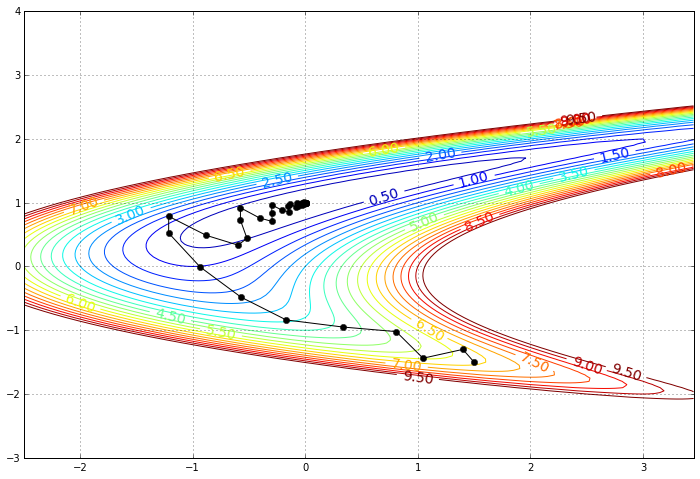

In [31]:
x1, x2 = heavy_ball_optimization(0.1, 0.7, [-1.5, 1.5], max_number_iterations=200)
create_plot(-2.5, 3.5, x1, x2, max_f=10, precision=0.5)

## $\alpha = 0.11, \beta = 0.05$ -  не сходится

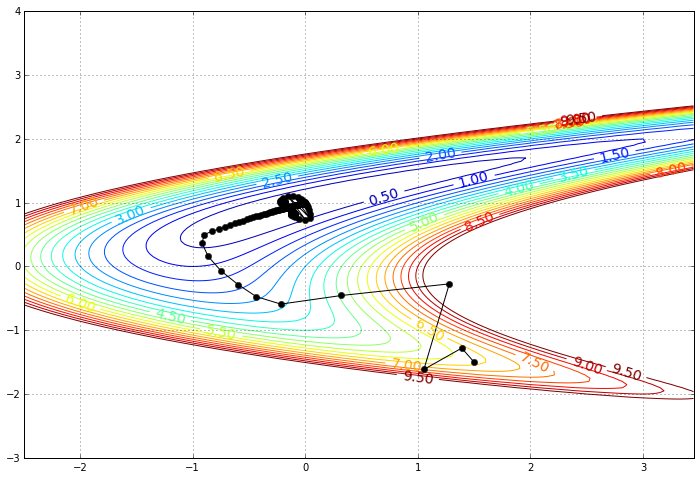

In [33]:
x1, x2 = heavy_ball_optimization(0.11, 0.05, [-1.5, 1.5], max_number_iterations=4000)
create_plot(-2.5, 3.5, x1, x2, max_f=10, precision=0.5)

## $\alpha = 0.05, \beta = 0.03$ -  сходится медленно

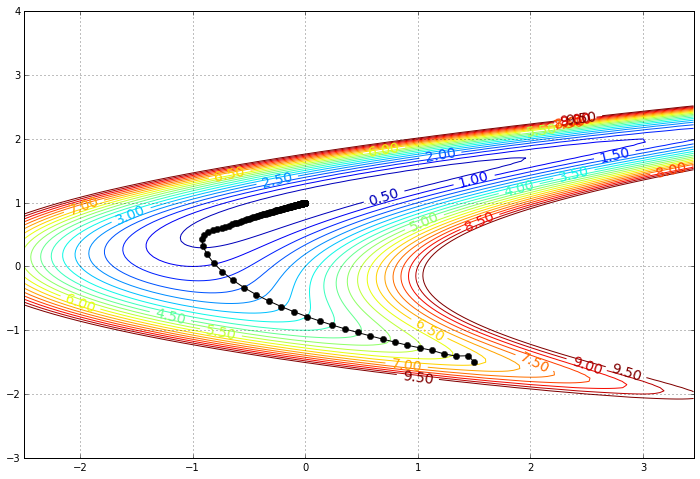

In [70]:
x1, x2 = heavy_ball_optimization(0.05, 0.3, [-1.5, 1.5], max_number_iterations=800)
create_plot(-2.5, 3.5, x1, x2, max_f=10, precision=0.5)

### Исследование скорости сходимости

При правильном $\beta$ метод сходится даже при $\alpha > 0.1,$ например, $\alpha=0.13, \beta=0.4.$

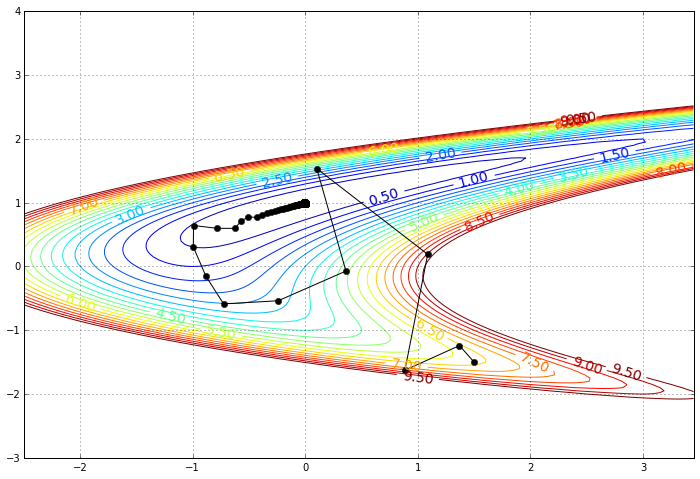

In [53]:
x1, x2 = heavy_ball_optimization(0.13, 0.4, [-1.5, 1.5], max_number_iterations=2000)
create_plot(-2.5, 3.5, x1, x2, max_f=10, precision=0.5)

Построим график сходимости.

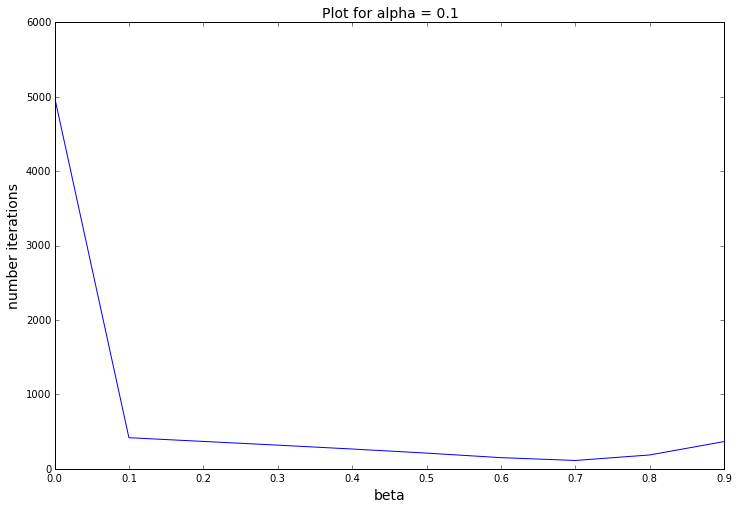

In [74]:
alpha = 0.1
beta_list = arange(0, 1, 0.1)
alpha_iter = []
for j in beta_list:
        x1, x2 = heavy_ball_optimization(alpha, j, [-1.5, 1.5], max_number_iterations=5000)
        alpha_iter.append(len(x1))
        
plt.figure(figsize=(12,8))
plt.plot(beta_list, alpha_iter)
plt.xlabel('beta', fontsize=14)
plt.ylabel('number iterations', fontsize=14)
plt.title('Plot for alpha = {}'.format(alpha), fontsize=14)
plt.show()

#### Вывод: поигравшись с графиком выше, я пришла к выводу, что при $\alpha \leq0.1,$ метод тяжелого шара сходится при $\beta > 0$, при $0.1 < \alpha < 0.14$ сходится при $\beta \in B(\alpha),$ при $\alpha > 0.14$ расходится.